In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_big.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 2.
part_sd = 0.05

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

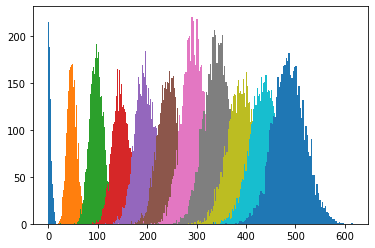

In [2]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [3]:
energy_mean= [np.mean(data_) for data_ in data]
energy_std = [np.std(data_) for data_ in data]

a = 0.04896312199359246 +- 5.6136536038548814e-05
b = -0.5907651365587838 +- 0.11096073730453503


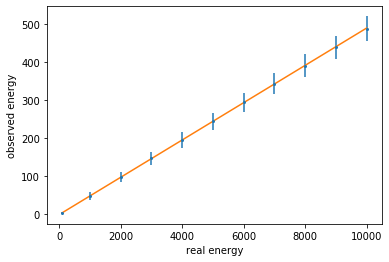

In [4]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [5]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [6]:
f = open("reduction_big.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [7]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]

# def curve(x, mu, sigma, nevents):
#     return nevents / (np.sqrt(2 * np.pi * sigma**2) * x) * np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

sigmas = {}
delta_sigmas = {}

In [8]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 498.6300710931414 +- 2.326080540784041
sigma = 140.6264516911877 +- 1.8764833541106216
nevents = 11656.92472795674 +- 185.5255756299543
mean = 507.52445760731445
std = 148.12215081799314




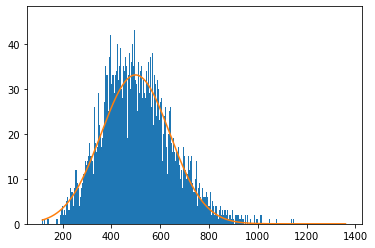

In [9]:
proc(0, 500, [500, 150, 10000])

mu = 1504.6921478589159 +- 3.8461257319391975
sigma = 242.6807784455863 +- 3.0202151783137268
nevents = 21095.654978157665 +- 324.92689854268457
mean = 1512.0409313002397
std = 254.7964243404269




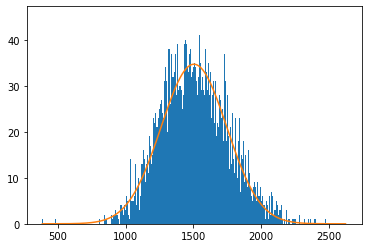

In [10]:
proc(1, 500, [1500, 200, 100000])

mu = 2490.5109788001187 +- 4.7751355503336566
sigma = 312.9190776293138 +- 3.817434730453431
nevents = 23871.92310838233 +- 354.12373687465663
mean = 2505.6509573595786
std = 324.38239805996034




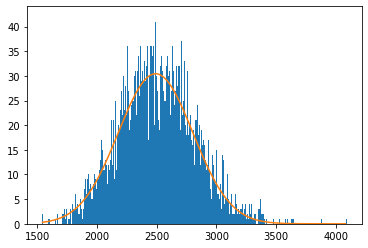

In [11]:
proc(2, 500, [2500, 300, 100000])

mu = 3514.632148144224 +- 5.592101360268889
sigma = 369.0231532235084 +- 4.367160945457737
nevents = 33127.13988753329 +- 491.14593129094595
mean = 3519.6821901820576
std = 383.5797307171785




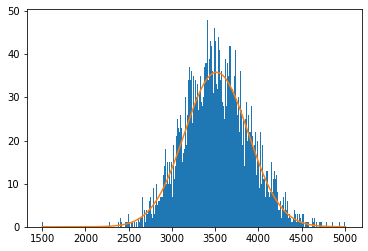

In [12]:
proc(3, 500, [3500, 400, 100000])

mu = 4520.572322211522 +- 6.371756017202204
sigma = 429.5281895772167 +- 5.089069661915981
nevents = 30566.470467505846 +- 440.1145078474024
mean = 4525.777616336594
std = 440.74361818155774




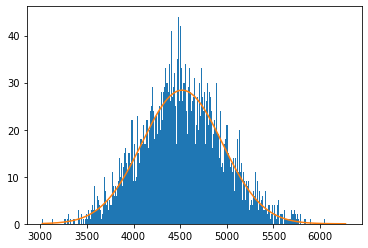

In [13]:
proc(4, 500, [4500, 500, 100000])

mu = 5500.9051075251555 +- 7.328859846202266
sigma = 474.33423699040867 +- 5.820132674077054
nevents = 33991.95637311276 +- 507.5580001915066
mean = 5504.477923728577
std = 489.0557021887135




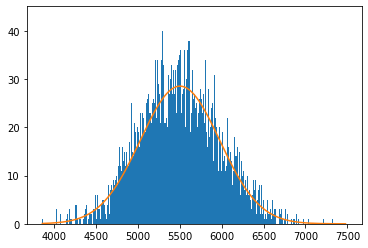

In [14]:
proc(5, 500, [5500, 500, 100000])

mu = 6505.424757708113 +- 7.4119694529391325
sigma = 512.1638862157794 +- 5.672093390504344
nevents = 59657.59477466622 +- 844.6696505576069
mean = 6511.4848331011535
std = 530.8690482634759




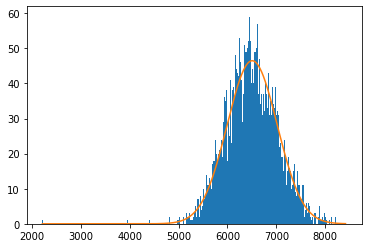

In [15]:
proc(6, 500, [6500, 500, 100000])

mu = 7488.03500945115 +- 8.699019648674867
sigma = 561.1230846355813 +- 6.718266945496315
nevents = 51335.849940662054 +- 779.1915923294194
mean = 7492.526625540084
std = 583.8911608022374




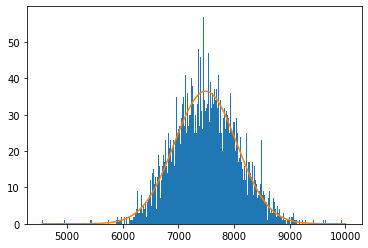

In [16]:
proc(7, 500, [7500, 600, 100000])

mu = 8457.82652772564 +- 9.35618998350714
sigma = 586.286260489473 +- 7.287970186385489
nevents = 46435.69304777149 +- 727.4783024768249
mean = 8467.096761656907
std = 619.3985719883038




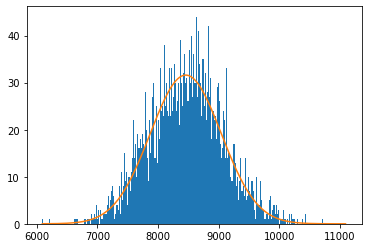

In [17]:
proc(8, 500, [8500, 500, 1000000])

mu = 9458.50585325767 +- 9.411439654359365
sigma = 632.249132409321 +- 7.164195137454764
nevents = 92042.81411161475 +- 1344.6983445575831
mean = 9452.778634849466
std = 654.1245239421486




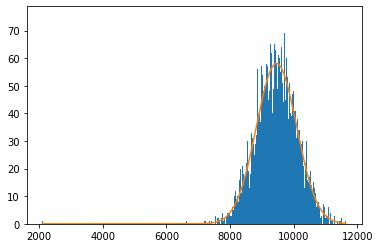

In [18]:
proc(9, 500, [9500, 700, 1000000])

In [19]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.0029063929724401655 +- 0.0008763866908482026
b = 6.156579975679006 +- 0.06264395468732616


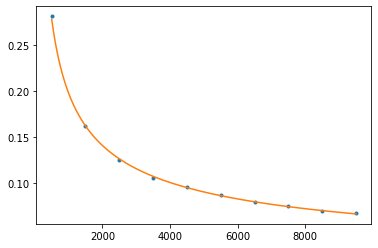

In [20]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [21]:
# file = open('results.txt', 'a+')
# file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
# file.close()

a = 0.013887202120532375 +- 0.007892149865838504
b = 6.75674486224305 +- 0.43303585464814137
c = -0.16604708440515967 +- 0.1186827315886841


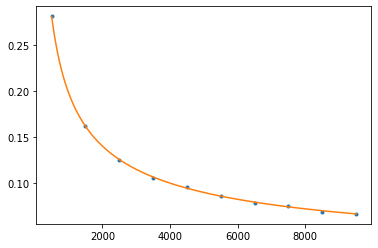

In [22]:
def curve_energy_modified(x, a, b, c):
    return a + b / np.sqrt(x) + c / np.sqrt(np.sqrt(x))

popt, pcov = spopt.curve_fit(curve_energy_modified, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b, c = popt
delta_a, delta_b, delta_c = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}\nc = {c} +- {delta_c}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy_modified(x, a, b, c))